# Matplotlib 中的布局

在本教程中，我们将探索 Matplotlib 的一些核心功能，并通过示例来演示如何创建和自定义各种图表。


In [2]:
# 导入所需的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 设置 Matplotlib 参数以支持中文和负号显示
plt.rcParams['font.sans-serif'] = ['SimHei']   # 设置字体以支持中文显示
plt.rcParams['axes.unicode_minus'] = False   # 设置正常显示负号

## 子图布局策略

### 均匀子图布局

使用 `plt.subplots` 可以快速地创建一个子图网格。这是创建多个子图的便捷方法，每个子图位置都是均匀分布的。

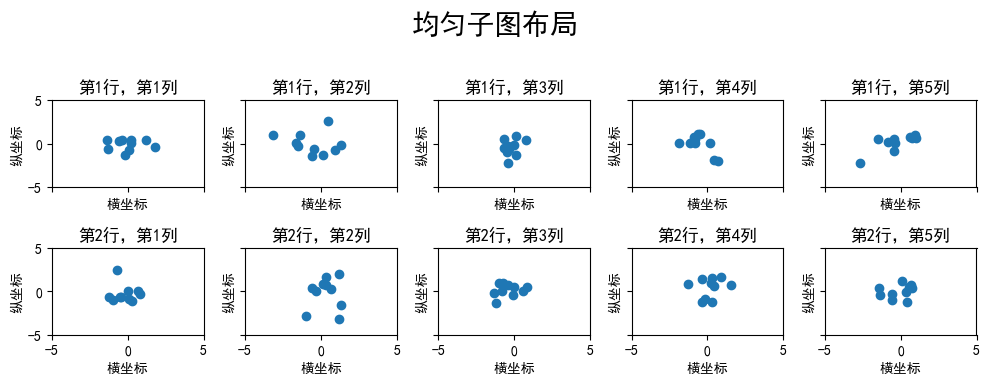

In [12]:
# 创建一个 2x5 的子图网格
fig, axs = plt.subplots(2, 5, figsize=(10, 4), sharex=True, sharey=True)
fig.suptitle('均匀子图布局', size=20)

# 在每个子图上绘制散点图
for i in range(2):
    for j in range(5):
        axs[i, j].scatter(np.random.randn(10), np.random.randn(10))
        axs[i, j].set_title(f'第{i+1}行，第{j+1}列')
        axs[i, j].set_xlim(-5, 5)
        axs[i, j].set_ylim(-5, 5)
        # if i == 1: axs[i, j].set_xlabel('横坐标')
        # if j == 0: axs[i, j].set_ylabel('纵坐标')
        axs[i, j].set_xlabel('横坐标')
        axs[i, j].set_ylabel('纵坐标')

# 调整布局以防止重叠
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

`fig.tight_layout()` 方法会自动调整子图参数，使之填充整个图像区域，这样可以避免子图之间的标题和标签重叠。

### 非均匀子图布局

#### 使用 GridSpec 创建非均匀子图

GridSpec 允许更灵活的子图布局。你可以指定每行和每列的相对大小。

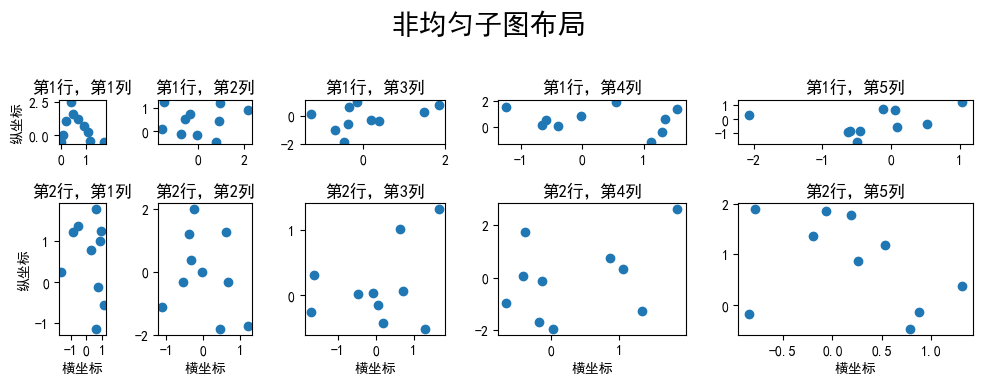

In [4]:
# 使用 GridSpec 创建非均匀子图
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=5, width_ratios=[1, 2, 3, 4, 5], height_ratios=[1, 3])
fig.suptitle('非均匀子图布局', size=20)

# 创建并填充子图
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(spec[i, j])
        ax.scatter(np.random.randn(10), np.random.randn(10))
        ax.set_title(f'第{i+1}行，第{j+1}列')
        if i == 1: ax.set_xlabel('横坐标')
        if j == 0: ax.set_ylabel('纵坐标')

# 调整布局
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

#### 子图合并

GridSpec 也支持子图的合并。通过切片，你可以跨多行或多列合并子图。

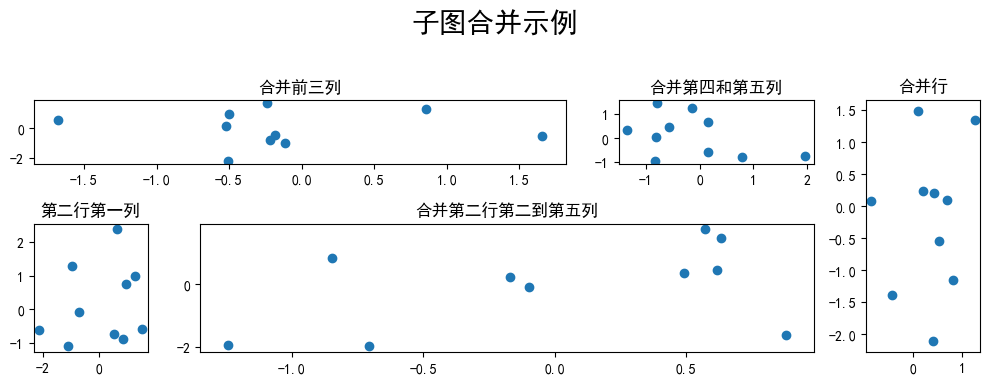

In [13]:
# 创建一个新的 figure
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=6, width_ratios=[2, 2.5, 3, 1, 1.5, 2], height_ratios=[1, 2])
fig.suptitle('子图合并示例', size=20)

# 创建合并后的子图
ax1 = fig.add_subplot(spec[0, :3])
ax1.scatter(np.random.randn(10), np.random.randn(10))
ax1.set_title('合并前三列')

ax2 = fig.add_subplot(spec[0, 3:5])
ax2.scatter(np.random.randn(10), np.random.randn(10))
ax2.set_title('合并第四和第五列')

ax3 = fig.add_subplot(spec[:, 5])
ax3.scatter(np.random.randn(10), np.random.randn(10))
ax3.set_title('合并行')

ax4 = fig.add_subplot(spec[1, 0])
ax4.scatter(np.random.randn(10), np.random.randn(10))
ax4.set_title('第二行第一列')

ax5 = fig.add_subplot(spec[1, 1:5])
ax5.scatter(np.random.randn(10), np.random.randn(10))
ax5.set_title('合并第二行第二到第五列')

# 调整布局
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

### 增强子图上的方法

#### 绘制参考线

在子图上绘制参考线可以帮助分析数据。

Text(0.5, 1.0, '绘制参考线')

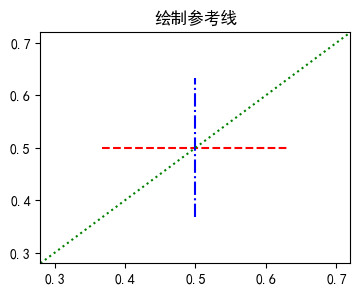

In [15]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.axhline(y=0.5, xmin=0.2, xmax=0.8, color='red', linestyle='--')
ax.axvline(x=0.5, ymin=0.2, ymax=0.8, color='blue', linestyle='-.')
ax.axline([0.3, 0.3], [0.7, 0.7], color='green', linestyle=':');
ax.set_title('绘制参考线')

#### 添加网格

网格可以帮助我们估计图表中的数值。

Text(0.5, 1.0, '添加网格')

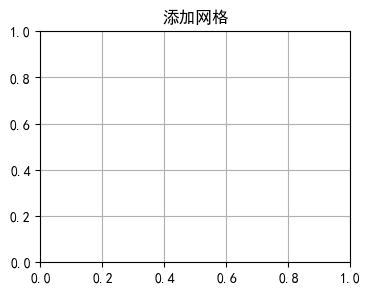

In [16]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.grid(True)
ax.set_title('添加网格')

#### 设置坐标轴的规度

改变坐标轴的规度可以更好地展示数据的分布。

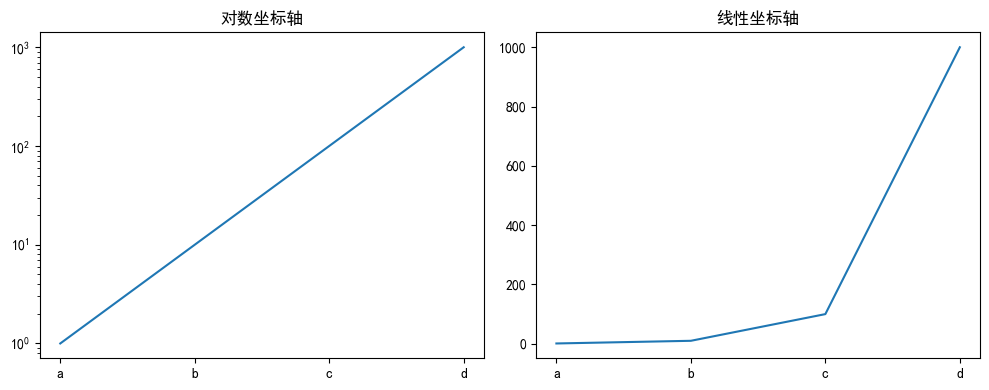

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# 对数坐标轴
axs[0].plot(list('abcd'), [10**i for i in range(4)])
axs[0].set_yscale('log')
axs[0].set_title('对数坐标轴')

# 线性坐标轴
axs[1].plot(list('abcd'), [10**i for i in range(4)])
axs[1].set_title('线性坐标轴')

fig.tight_layout()